In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
articles_dataset_root_path = 'data/'
articles = pd.read_csv(articles_dataset_root_path + 'articles.csv', sep = ';', index_col = [0])

In [3]:
articles

,title,content,date,author,region,zone
0,D’Alberto alla riunione delle ANCI regionali c...,TERAMO – Il Presidente Gianguido D’Alberto ha ...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"Coronavirus, le novità introdotte dal DPCM 10 ...",Sul sito del Ministero dell’Interno è stata pu...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"Coronavirus, nuove misure per vendita generi a...","PESCARA – Oggi, mercoledì 15 aprile, il Presid...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"Regione, ecco la guida per la formazione a dis...",PESCARA – Una vera e propria guida operativa i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,Ministro Amendola e Oddati all’iniziativa Pd A...,REGIONE – “Le scelte del Pd. Per l’Italia e pe...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,"Copie pirata di giornali su Telegram, salgono ...",È salito a 114 il numero dei canali Telegram s...,2020-05-04,La Repubblica,Lazio,Centre
24580,"Inchiesta sulla sanità umbra, chiuse le indagi...",La chiusura dell'indagine sulle assunzioni in ...,2020-05-04,La Repubblica,Lazio,Centre
24581,"Coronavirus in Italia, 3691 denunciati nel pri...",ROMA - Chi si aspettava un boom di sanzioni ne...,2020-05-05,La Repubblica,Lazio,Centre
24582,"Coronavirus, Medicina, la denuncia di Azione: ...",Ventiduemila medici sono pronti a entrare in s...,2020-05-06,La Repubblica,Lazio,Centre


# Analysis based on arbitrary keywords

In [59]:
keywords = ['covid', 'coronavirus','covid 19']#, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']
keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]
articles_with_covid_keywords

,title,content,date,author,region,zone
19,"Affitti commerciali, Testa: “Il Governo confer...",REGIONE – “Solo sostegni economici con formula...,2020-05-04,Abruzzonews,Abruzzo,Centre
23,"Ristoranti e Alberghi, crollo del fatturato in...",REGIONE – Il lockdown disposto per contenere i...,2020-04-03,Abruzzonews,Abruzzo,Centre
25,"Regione, coronavirus: precisazioni di Sospiri ...",PESCARA – “Quella approvata ieri dal Consiglio...,2020-04-02,Abruzzonews,Abruzzo,Centre
33,"Ripartiamo Abruzzo, ecco il programma per dare...",REGIONE – Consentire alle imprese iscritte all...,2020-04-16,Abruzzonews,Abruzzo,Centre
37,"Regione, copertura assicurativa per 47 unità S...","REGIONE – “La Giunta regionale ha deliberato, ...",2020-04-16,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24575,Coronavirus nel mondo: negli Usa un morto ogni...,"Le accuse di Pompeo alla Cina""Ci sono numerose...",2020-05-03,La Repubblica,Lazio,Centre
24576,"Coronavirus, nelle carceri arrivano 1000 opera...",Mille nuovi operatori sanitari per le carceri ...,2020-05-03,La Repubblica,Lazio,Centre
24581,"Coronavirus in Italia, 3691 denunciati nel pri...",ROMA - Chi si aspettava un boom di sanzioni ne...,2020-05-05,La Repubblica,Lazio,Centre
24582,"Coronavirus, Medicina, la denuncia di Azione: ...",Ventiduemila medici sono pronti a entrare in s...,2020-05-06,La Repubblica,Lazio,Centre


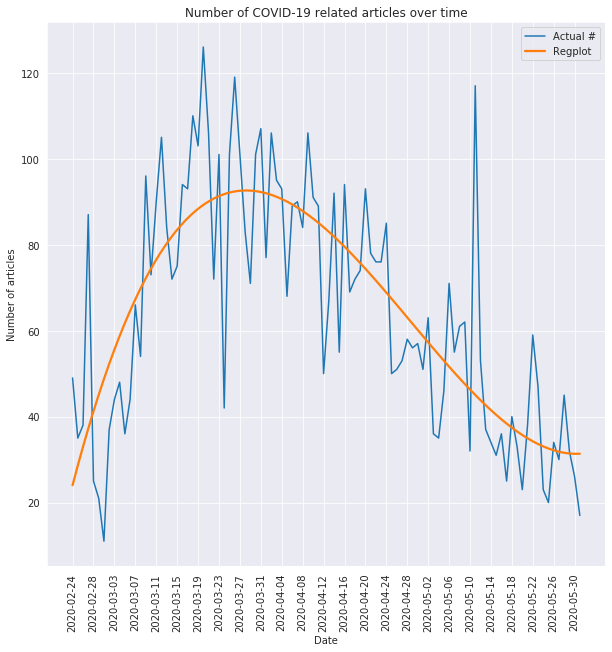

In [63]:
import matplotlib.ticker as plticker
import matplotlib
from datetime import datetime

sns.set_style("darkgrid")
keywords = ['covid', 'coronavirus','covid 19']#, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']

keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]

count_articles_dataset = articles_with_covid_keywords.groupby('date').count().iloc[:,0]
dates =count_articles_dataset.index

fig, ax = plt.subplots(figsize=(10, 10))    
sns.lineplot(dates, count_articles_dataset.values, ax = ax);
sns.regplot(range(len(dates)), count_articles_dataset.values, ax = ax, order = 3, scatter = False, ci = None);

ax.set_xticks(dates[::4])
ax.set_xticklabels(dates[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('Number of COVID-19 related articles over time')
plt.show(ax)

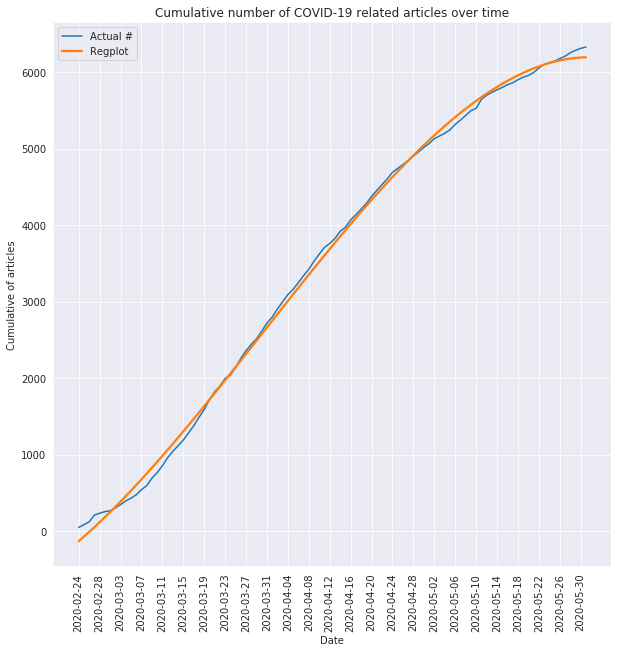

In [70]:

cumulative_cols = ['date', 'cumulative_num_articles']
cumulative = pd.DataFrame()

for i in range(len(count_articles_dataset.index)):
    date_tmp = count_articles_dataset.index[i]
    cumulative_sum_tmp = sum(count_articles_dataset.values[:i+1])
    cumulative = cumulative.append(pd.DataFrame(data = [[date_tmp, cumulative_sum_tmp]], columns = cumulative_cols, index = [len(cumulative.index)]))
    
    
fig, ax = plt.subplots(figsize=(10, 10))    
sns.lineplot(cumulative.date, cumulative.cumulative_num_articles, ax = ax);
sns.regplot(range(len(cumulative.date)), cumulative.cumulative_num_articles, ax = ax, order = 3, scatter = False, ci = None);

ax.set_xticks(cumulative.date[::4])
ax.set_xticklabels(cumulative.date[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Cumulative of articles')
plt.title('Cumulative number of COVID-19 related articles over time')
plt.show(ax)

    